In [1]:
import pandas as pd
from palmerpenguins import load_penguins
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Simulate the Palmer Penguins dataset
np.random.seed(42)
penguins = pd.DataFrame({
    "species": np.random.choice(["Adelie", "Chinstrap", "Gentoo"], size=344),
    "island": np.random.choice(["Torgersen", "Biscoe", "Dream"], size=344),
    "bill_length_mm": np.random.normal(45, 5, 344),
    "bill_depth_mm": np.random.normal(15, 2, 344),
    "flipper_length_mm": np.random.normal(200, 20, 344),
    "body_mass_g": np.random.normal(4000, 500, 344),
    "sex": np.random.choice(["Male", "Female"], size=344)
})

In [3]:
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Gentoo  Torgersen       44.159646      17.010204         182.235785   
1  Adelie  Torgersen       46.425877      13.985125         172.739207   
2  Gentoo  Torgersen       42.640401      14.341338         186.550211   
3  Gentoo     Biscoe       46.086032      14.806348         154.303609   
4  Adelie  Torgersen       42.640612      14.048939         190.209211   

   body_mass_g     sex  
0  4145.724962    Male  
1  3634.659018  Female  
2  3901.097657    Male  
3  3810.121330  Female  
4  3956.180871  Female  


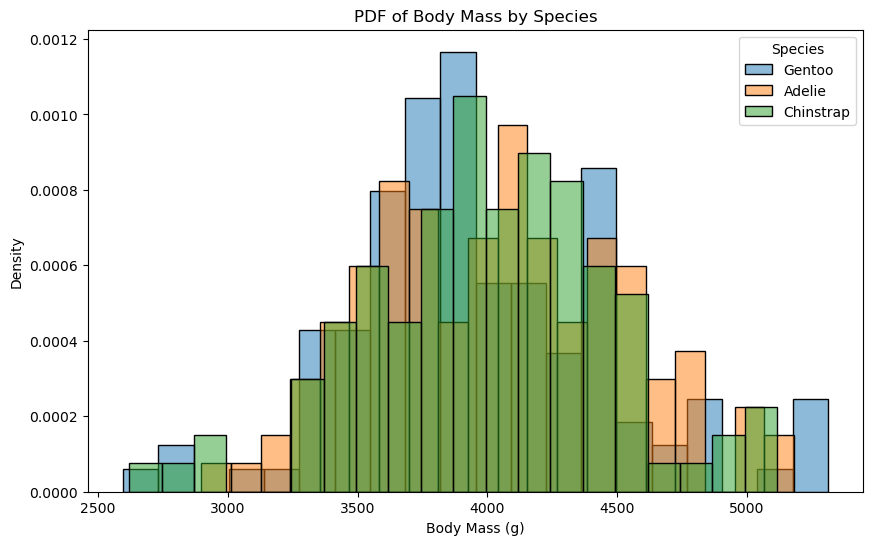

In [4]:
plt.figure(figsize=(10, 6))

# Plot PDF for each species
for species in penguins['species'].unique():
    subset = penguins[penguins['species'] == species]['body_mass_g']
    sns.histplot(subset, kde=False, stat="density", bins=20, alpha=0.5, label=species)

plt.title('PDF of Body Mass by Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Density')
plt.legend(title='Species')
plt.show()

C:\Users\keith\AppData\Local\Temp\ipykernel_8916\3855349265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='body_mass_g', data=penguins, palette='pastel')


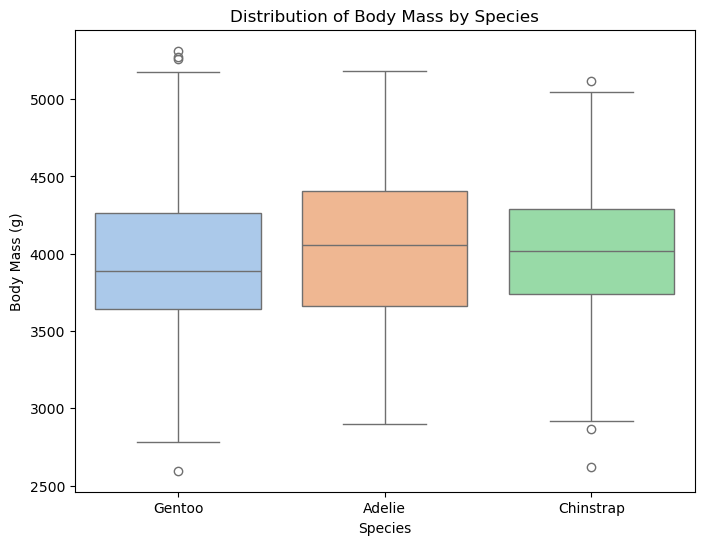

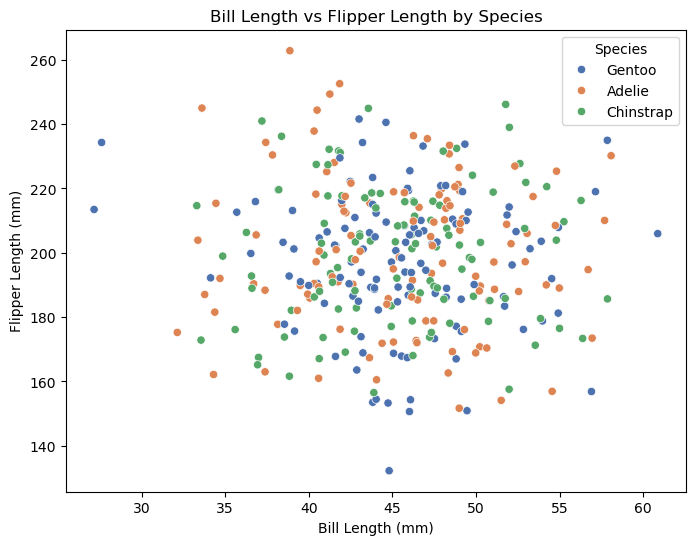

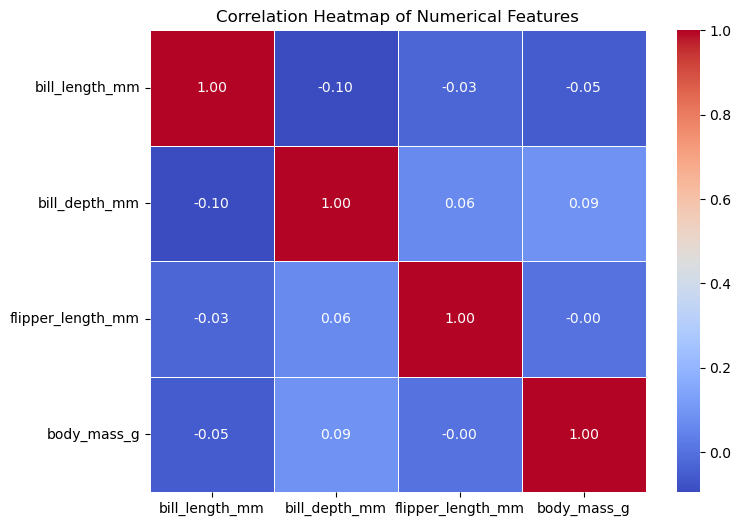

In [5]:
# Plot 1: Distribution of Body Mass by Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='body_mass_g', data=penguins, palette='pastel')
plt.title('Distribution of Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

# Plot 2: Relationship Between Bill Length and Flipper Length by Species
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=penguins, palette='deep')
plt.title('Bill Length vs Flipper Length by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species')
plt.show()

# Plot 3: Correlation Heatmap for Numerical Features
plt.figure(figsize=(8, 6))
correlation_matrix = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [6]:
from scipy.stats import mannwhitneyu, kruskal

In [7]:
adelie_mass = penguins[penguins['species'] == 'Adelie']['body_mass_g']
gentoo_mass = penguins[penguins['species'] == 'Gentoo']['body_mass_g']
u_stat, p_value = mannwhitneyu(adelie_mass, gentoo_mass, alternative='two-sided')

print(f"Mann-Whitney U Test: U-Statistic = {u_stat}, P-Value = {p_value}")

# Kruskal-Wallis Test (e.g., Body Mass Across All Species)
species_groups = [penguins[penguins['species'] == species]['body_mass_g'] for species in penguins['species'].unique()]
h_stat, p_value = kruskal(*species_groups)

print(f"Kruskal-Wallis Test: H-Statistic = {h_stat}, P-Value = {p_value}")


Mann-Whitney U Test: U-Statistic = 7683.0, P-Value = 0.209310149384064
Kruskal-Wallis Test: H-Statistic = 2.07403732878106, P-Value = 0.35451002136723053


C:\Users\keith\AppData\Local\Temp\ipykernel_8916\55926603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='body_mass_g', data=penguins, palette='pastel')


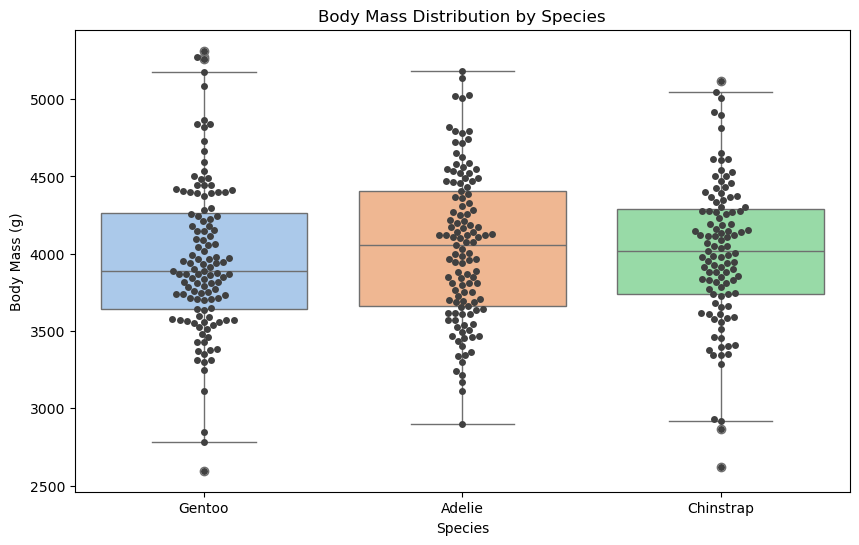

In [8]:
plt.figure(figsize=(10, 6))

# Boxplot to compare body mass across species
sns.boxplot(x='species', y='body_mass_g', data=penguins, palette='pastel')

# Overlay swarm plot to visualize individual data points
sns.swarmplot(x='species', y='body_mass_g', data=penguins, color='.25', size=5)

plt.title('Body Mass Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()


In [9]:
from scipy.stats import shapiro, anderson

In [10]:
stat, p_value = shapiro(adelie_mass)
print(f"Shapiro-Wilk Test: Statistic = {stat}, P-Value = {p_value}")

# Anderson-Darling Test for normality (e.g., Adelie body mass)
anderson_result = anderson(adelie_mass, dist='norm')
print(f"Anderson-Darling Test: Statistic = {anderson_result.statistic}, Critical Values = {anderson_result.critical_values}")

Shapiro-Wilk Test: Statistic = 0.9899693131110685, P-Value = 0.550536830172498
Anderson-Darling Test: Statistic = 0.3425553102286898, Critical Values = [0.558 0.635 0.762 0.889 1.058]


<Figure size 1000x600 with 0 Axes>

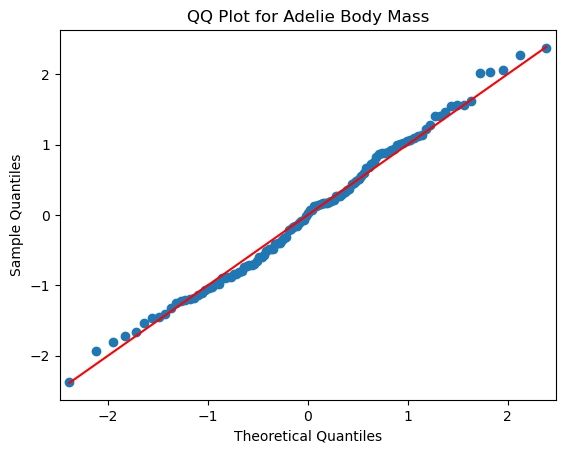

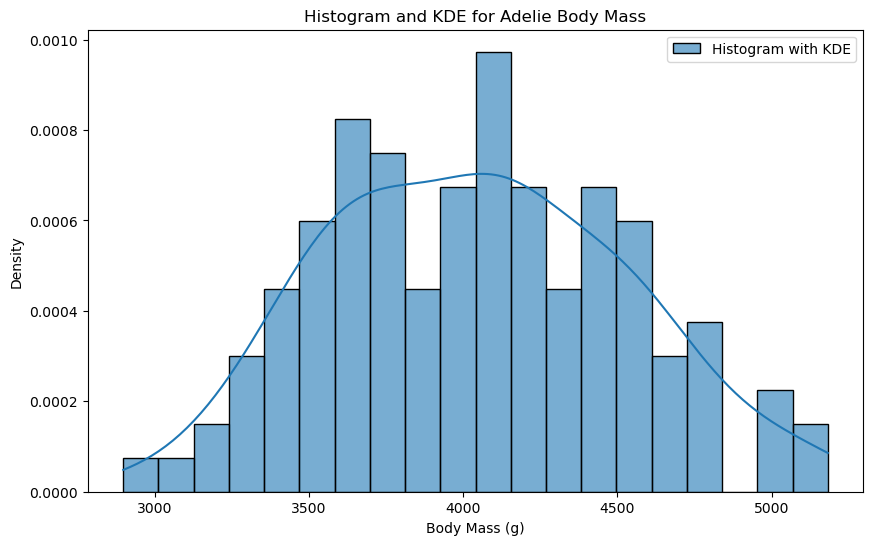

In [11]:
import statsmodels.api as sm

# QQ Plot for Adelie body mass
adelie_mass = penguins[penguins['species'] == 'Adelie']['body_mass_g']

plt.figure(figsize=(10, 6))
sm.qqplot(adelie_mass, line='s', fit=True)
plt.title('QQ Plot for Adelie Body Mass')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Histogram with KDE overlay for Adelie body mass
plt.figure(figsize=(10, 6))
sns.histplot(adelie_mass, kde=True, stat="density", bins=20, alpha=0.6, label='Histogram with KDE')
plt.title('Histogram and KDE for Adelie Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Density')
plt.legend()
plt.show()


# median test and PCA 

In [15]:
from scipy.stats import median_test
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
median_stat, median_p, _, _ = median_test(
    penguins[penguins['species'] == 'Adelie']['body_mass_g'],
    penguins[penguins['species'] == 'Chinstrap']['body_mass_g'],
    penguins[penguins['species'] == 'Gentoo']['body_mass_g']
)

C:\Users\keith\AppData\Local\Temp\ipykernel_8916\1317072991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='body_mass_g', data=penguins, palette='pastel')


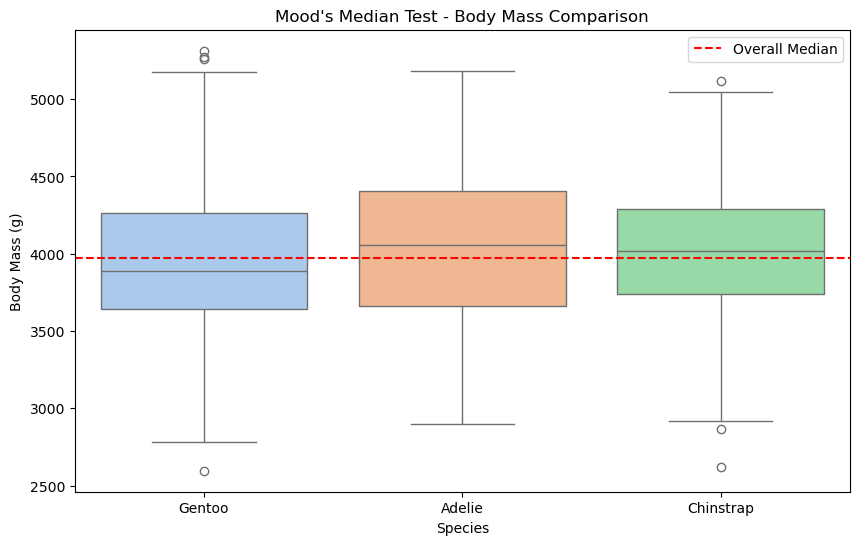

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='body_mass_g', data=penguins, palette='pastel')
plt.axhline(y=penguins['body_mass_g'].median(), color='red', linestyle='--', label='Overall Median')
plt.title("Mood's Median Test - Body Mass Comparison")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.legend()
plt.show()

In [30]:

numeric_features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]




In [31]:

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Applying PCA
pca = PCA(n_components=2)  # Reducing to 2 principal components
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for visualization
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['species'] = penguins['species']  # Add species back for visualization

# Display results
median_stat, median_p, pca.explained_variance_ratio_


(5.156482147136353, 0.07590740220576879, array([0.29499111, 0.25040419]))

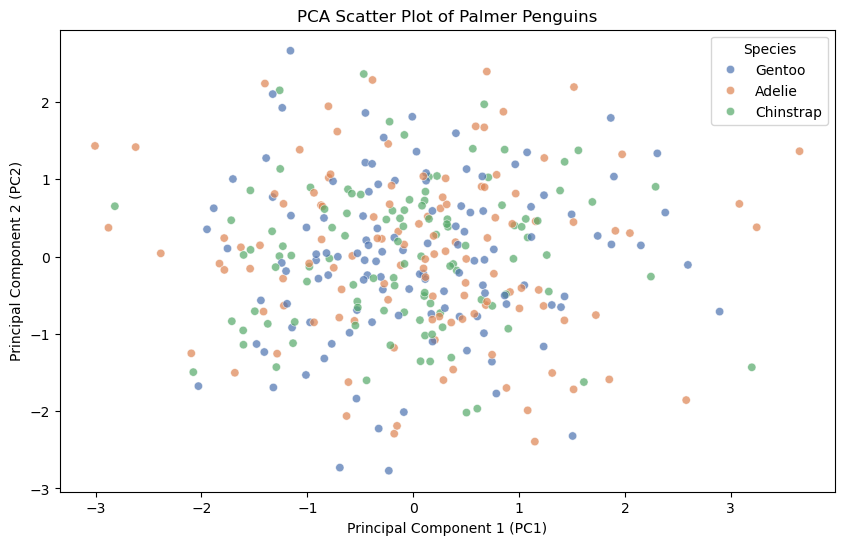

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['species'], palette='deep', alpha=0.7)
plt.title("PCA Scatter Plot of Palmer Penguins")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend(title="Species")
plt.show()


# performing a t test 

In [33]:
male_mass = penguins[penguins['sex'] == 'Male']['body_mass_g']
female_mass = penguins[penguins['sex'] == 'Female']['body_mass_g'] 

t_stat, p_value = ttest_ind(male_mass, female_mass, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.08579179053124886, P-value: 0.9316821352135175


# chi square test

In [34]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(penguins['species'], penguins['island'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, P-value: {p}, Degrees of Freedom: {dof}")


Chi-squared: 1.623641499138074, P-value: 0.8045368804360488, Degrees of Freedom: 4


# Correlation Analysis

In [35]:
# Correlation matrix for numerical features
correlation_matrix = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

print(correlation_matrix)


                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.095136          -0.027836   
bill_depth_mm           -0.095136       1.000000           0.064952   
flipper_length_mm       -0.027836       0.064952           1.000000   
body_mass_g             -0.054342       0.091483          -0.000997   

                   body_mass_g  
bill_length_mm       -0.054342  
bill_depth_mm         0.091483  
flipper_length_mm    -0.000997  
body_mass_g           1.000000  
